<a href="https://colab.research.google.com/github/Hayeon101/deep-learning-basic/blob/main/03/03_04_%EB%AF%B8%EB%8B%88_%EB%B0%B0%EC%B9%98%EC%99%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%8D%94_(Mini_Batch_and_DataLoader).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터를 로드하는 방법과 미니 배치 경사 하강법 (Minibatch Gradient Descent) 에 대해서 배웁니다.

## 1. 미니 배치와 배치 크기 (Mini Batch and Batch Size)

```python
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])
```
위 코드에서 알 수 있듯이 03-03에서 다중 선형 회귀 구현에 사용했던 데이터의 샘플은 5개입니다. 이 데이터는 현업에서 다루는 방대한 양의 데이터에 비하면 굉장히 적은 양입니다. 예를 들어, 데이터가 수십만개 이상이라면 모든 데이터에 대해 경사 하강법을 수행하는 것은 느리고 많은 계산량이 필요한 작업입니다.

따라서 방대한 양의 전체 데이터를 작은 단위로 나누어서 단위별 학습하는 개념이 나왔는데, 이를 미니 배치 (Mini Batch) 라고 합니다.

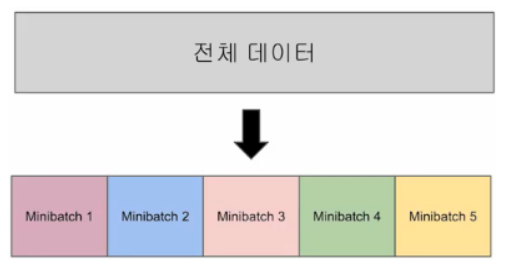

그림과 같이 전체 데이터를 미니 배치 단위로 나눈 후, 각각의 미니 배치에 대한 비용 (cost) 을 계산하고 경사 하강법을 수행합니다. 모든 미니 배체의 작업을 반복하여 모든 데이터에 대한 학습이 1회 끝나면 1 Epoch가 끝나게 됩니다.

* **배치 (batch) 에 대한 설명**
  - 에포크 (Epoch) 는 전체 훈련 데이터가 학습에 한 번 사용된 주기입니다. 미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 1 에포크가 됩니다.
  - **배치 경사 하강법**
    - 전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 배치 경사 하강법이라고 부릅니다.
    - 한 번에 전체 데이터를 사용하므로 가중치 값을 최적의 값에 수렴하는 과정이 안정적이지만 계산량이 많습니다.
  - **미니 배치 경사 하강법**
    - 미니 배치 단위로 경사 하강법을 수행하는 방법은 미니 배치 경사 하강법이라고 부릅니다.
    - 데이터의 일부만을 보고 경사 하강법을 진행하기 때문에 가중치 최적값을 찾는 과정에서 헤맬 수도 있지만 훈련 속도가 빠릅니다.
  - 배치 크기는 보통 2의 제곱수를 사용하는데, CPU와 GPU의 메모리 수에 맞추기 위함입니다.
  

## 2. 이터레이션 (Iteration)

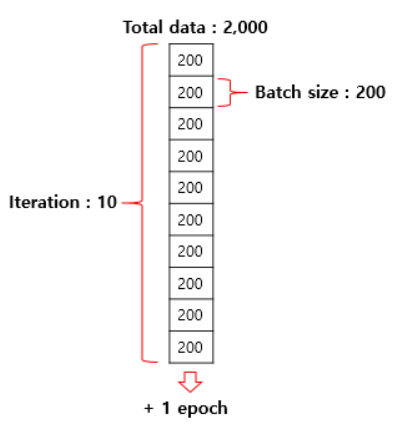

위 그림을 보면 한 번의 에포크 내에서 매개변수인 가중치 $W$와 $b$의 업데이트 횟수가 이터레이션임을 알 수 있습니다. 전체 데이터가 2,000일 때 미니 데이터 단위를 200으로 해서 나눈다면 매개변수 업데이트가 10번 이루어지며 한 번의 에포크가 끝납니다.

## 3. 데이터 로드하기 (Data Load)

Pytorch는 데이터를 쉽게 다를 수 있도록 데이터셋(Dataset)과 데이터로더(DataLoader)라는 도구를 제공합니다. 이를 통해서 **미니 배치 학습**, 데이터 셔플, 병렬 처리를 수행할 수 있습니다.

기본적으로 Dataset을 받아와 정의하고, DataLoader에 전달하는 방식입니다.

이제 텐서를 입력받아 Dataset의 형태로 변환해주는 TensorDataset을 살펴봅시다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# TensorDataset과 DataLoader를 import
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

dataset = TensorDataset(x_train, y_train)

DataLoader는 데이터셋, 그리고 미니 배치의 크기 2개의 인자를 입력받습니다. 또한 shuffle 인자는 shuffle=True를 선택하여 Epoch마다 데이터셋을 섞어 학습 순서를 바꿀 수 있게 해줍니다.

In [ ]:
dataloader = DataLoader(dataset,batch_size=2,shuffle=True)

model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 39736.695312
Epoch    0/20 Batch 2/3 Cost: 12269.709961
Epoch    0/20 Batch 3/3 Cost: 5143.483887
Epoch    1/20 Batch 1/3 Cost: 1058.416260
Epoch    1/20 Batch 2/3 Cost: 350.571289
Epoch    1/20 Batch 3/3 Cost: 119.220367
Epoch    2/20 Batch 1/3 Cost: 34.244133
Epoch    2/20 Batch 2/3 Cost: 15.032110
Epoch    2/20 Batch 3/3 Cost: 2.068249
Epoch    3/20 Batch 1/3 Cost: 2.038157
Epoch    3/20 Batch 2/3 Cost: 4.094908
Epoch    3/20 Batch 3/3 Cost: 0.252923
Epoch    4/20 Batch 1/3 Cost: 2.255120
Epoch    4/20 Batch 2/3 Cost: 2.938125
Epoch    4/20 Batch 3/3 Cost: 0.057676
Epoch    5/20 Batch 1/3 Cost: 0.174710
Epoch    5/20 Batch 2/3 Cost: 2.366730
Epoch    5/20 Batch 3/3 Cost: 7.263311
Epoch    6/20 Batch 1/3 Cost: 4.295079
Epoch    6/20 Batch 2/3 Cost: 0.362498
Epoch    6/20 Batch 3/3 Cost: 4.241579
Epoch    7/20 Batch 1/3 Cost: 0.599418
Epoch    7/20 Batch 2/3 Cost: 6.218347
Epoch    7/20 Batch 3/3 Cost: 0.157031
Epoch    8/20 Batch 1/3 Cost: 2.206019
Epoch

In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
new_var = torch.FloatTensor([[73,80, 75]])
# 입력한 값 [73,80,75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print('훈련 후 입력이 73,80,75일 때의 예측값 :',pred_y)

훈련 후 입력이 73,80,75일 때의 예측값 : tensor([[151.7957]], grad_fn=<AddmmBackward0>)


## 4. 커스텀 데이터셋 (Custom Dataset)

torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스인데, 이 클래스를 상속받아 메소드 오버라이딩을 통해 5번에서 커스텀 데이터셋을 만들어봅시다.

클래스의 뼈대는 이렇게 생겼습니다.


```python
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
    # 데이터셋의 전처리를 해 주는 부분
  
  def __len__(self):
    # 데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
  
  def __getitem__(self,idx):
    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수

```



## 5. 커스텀 데이터셋 (Custom Dataset)으로 선형 회귀 구현하기

In [5]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]]
    self.y_data = [[152],[185],[180],[196],[142]]

  # 총 데이터의 개수 리턴
  def __len__(self):
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [6]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

dataloader에서 가져온 각 배치는 samples 라는 변수에 저장되고, 이 배치에서 x_train과 y_train을 분리합니다.

In [8]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print(f'Epoch {epoch:4d}/{nb_epochs} Batch {batch_idx+1}/{len(dataloader)} Cost : {cost.item():.6f} ')

Epoch    0/20 Batch 1/3 Cost : 22702.554688 
Epoch    0/20 Batch 2/3 Cost : 9224.634766 
Epoch    0/20 Batch 3/3 Cost : 1203.451904 
Epoch    1/20 Batch 1/3 Cost : 802.456665 
Epoch    1/20 Batch 2/3 Cost : 307.424622 
Epoch    1/20 Batch 3/3 Cost : 88.704170 
Epoch    2/20 Batch 1/3 Cost : 24.380953 
Epoch    2/20 Batch 2/3 Cost : 10.451607 
Epoch    2/20 Batch 3/3 Cost : 2.808038 
Epoch    3/20 Batch 1/3 Cost : 1.595538 
Epoch    3/20 Batch 2/3 Cost : 0.169227 
Epoch    3/20 Batch 3/3 Cost : 0.976730 
Epoch    4/20 Batch 1/3 Cost : 0.442870 
Epoch    4/20 Batch 2/3 Cost : 0.501660 
Epoch    4/20 Batch 3/3 Cost : 0.306917 
Epoch    5/20 Batch 1/3 Cost : 0.774811 
Epoch    5/20 Batch 2/3 Cost : 0.275735 
Epoch    5/20 Batch 3/3 Cost : 0.181615 
Epoch    6/20 Batch 1/3 Cost : 0.316093 
Epoch    6/20 Batch 2/3 Cost : 0.704697 
Epoch    6/20 Batch 3/3 Cost : 0.207958 
Epoch    7/20 Batch 1/3 Cost : 0.283284 
Epoch    7/20 Batch 2/3 Cost : 0.777284 
Epoch    7/20 Batch 3/3 Cost : 0.381712 

In [9]:
# 임의의 입력 [73, 80, 75]를 선언
new_var = torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.3916]], grad_fn=<AddmmBackward0>)
